# 1) (i) linearity and additivity of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b) The slope of that line does not depend on the values of the other variables.

    (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

# 2) Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit”.

error=observed- predicted


# 3) Little or no auto-correlation

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

#4) Little or no multi-collinearity: (corelation bet x [check corelation & remove highly corelated variable  ])
It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other

# 5) There should be homoscedasticity or equal variance in our regression model.

This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). The sample plot below shows a violation of this assumption. For the lower values on the X-axis, the points are all very near the regression line. For the higher values on the X-axis, there is much more variability around the regression line.

To check homoscedasticity, we make a plot of residual values on the y-axis and the predicted values on the x-axis. If we see a bell curve, then we can say that there is no homoscedasticity. It means that the variability of a variable is unequal across the range of values of a second variable that predicts it.


# 6) The number of observations must be greater than number of Xs

# 7) The variability in X values is positive
This means the X values in a given sample must not all be the same (or even nearly the same).

# with explanation
1)  Linear Relationship Between Target & Features

In [0]:
import numpy as np
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]

In [2]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [6]:
#Next, we need to reshape the array named x because sklearn requires a 2D array

x_reshape = x.reshape(-1,1)
x_reshape

# we’re faking a 2D array here by using the .reshape(-1,1) method.

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_reshape, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_pred = linear.predict(x_reshape)

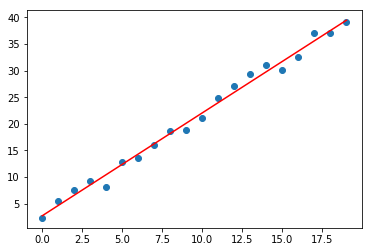

In [16]:

import matplotlib.pyplot as plt

plt.scatter(x_reshape, y)
plt.plot(x, Y_pred, color='red')
plt.show()





In [0]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
      
      

In [0]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [19]:
s1 = Stats(x_reshape, y, linear)
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [20]:
# Potential Problem: Data w/Nonlinear Pattern


y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
yp=nonlinear.predict(x_reshape)

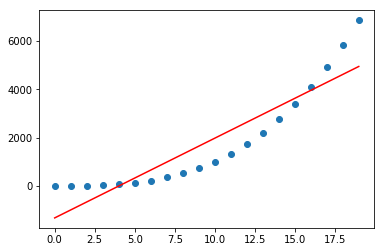

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x_reshape, y_nonlinear)
plt.plot(x_reshape, yp, color='red')
plt.show()


In [24]:
'''
That works well for low dimensional cases that are easy to visualize but how will you know if you have more than 2-3 features? 
The residual plot is a powerful tool in that case and something you should leverage often.

Let’s now plot a histogram of residuals to see if they’re Normally distributed for the linear case.
'''

'\nThat works well for low dimensional cases that are easy to visualize but how will you know if you have more than 2-3 features? \nThe residual plot is a powerful tool in that case and something you should leverage often.\n\nLet’s now plot a histogram of residuals to see if they’re Normally distributed for the linear case.\n'

Text(0.5, 1.0, 'Linear')

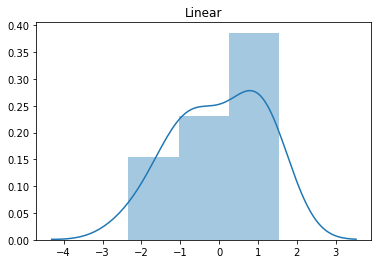

In [25]:
import seaborn as sns

residuals_linear = y - linear.predict(x_reshape)
residuals_nlinear = y_nonlinear - nonlinear.predict(x_reshape)

sns.distplot(residuals_linear);
plt.title('Linear')

Text(0.5, 1.0, 'Non-Linear')

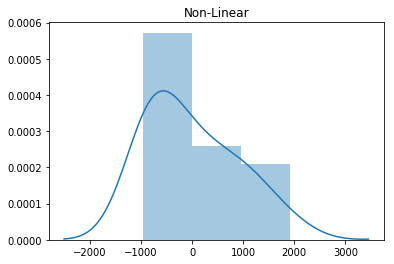

In [26]:
# now for the nonlinear case.

sns.distplot(residuals_nlinear)
plt.title('Non-Linear')

The histogram of the linear model on linear data looks approximately Normal (aka Gaussian) while the second histogram shows a skew. But is there a more quantitative method to test for Normality

In [27]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=array([1.71234546]), pvalue=array([0.42478474]))

The null hypothesis is that the residual distribution is Normally distributed. Since the p-value > 0.05, we cannot reject the null. In other words, we can confidently say the residuals are Normally distributed.

# Possible Solutions to Nonlinear Data
Consider transforming the features
Consider applying a different algorithm

#2) No Outliers

Investigate the outlier(s). Do NOT assume these cases are just bad data. Some outliers are true examples while others are data entry errors. You need to know which it is before proceeding.

Consider imputing (replace by median (most time), mean, mode)or removing outliers.

# 3) There should be no perfect multicollinearity in your model. (There is no perfect linear relationship between X variables)

Multicollinearity generally occurs when there are high correlations between two or more independent variables. In other words, one independent variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. 

We can check multicollinearity using VIF(variance inflation factor). Higher the VIF for an independent variable, more is the chance that variable is already explained by other independent variables

In [0]:
#create sample dataset with 3 x features

from sklearn.datasets.samples_generator import make_regression
x3, y3 = make_regression(n_samples=100, n_features=3, noise=20)

#convert to a pandas dataframe
import pandas as pd
df = pd.DataFrame(x3)
df.columns = ['x1','x2','x3']

#generate correlation matrix
corr = df.corr()

In [30]:
print(corr)

          x1        x2        x3
x1  1.000000  0.102503  0.051445
x2  0.102503  1.000000 -0.106644
x3  0.051445 -0.106644  1.000000


In [31]:
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3
x1,1,0.102503,0.0514447
x2,0.102503,1,-0.106644
x3,0.0514447,-0.106644,1


Low values will have a blue color while higher values will become “hot” and thus the red. 

#If two variable have more corelation then both contain same information so one variable should not select

#Using Variance Inflation factor (VIF). But, What is VIF?

VIF is a metric computed for every X variable that goes into a linear model. If the VIF of a variable is high, it means the information in that variable is already explained by other X variables present in the given model, which means, more redundant is that variable. So, lower the VIF (<2) the better. VIF for a X var is calculated as:


VIF=1/(1−Rsq)


where, Rsq is the Rsq term for the model with given X as response against all other Xs that went into the model as predictors.

Practically, if two of the X′s have high correlation, they will likely have high VIFs. Generally, VIF for an X variable should be less than 4 in order to be accepted as not causing multi-collinearity. The cutoff is kept as low as 2, if you want to be strict about your X variables.

Steps for Implementing VIF Run a multiple regression.

1)Calculate the VIF factors.          

2)Inspect the factors for each predictor variable, if the VIF is between 5-10, 

3)multicolinearity is likely present and you should consider dropping the variable.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],
     'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9],
     'd': [4, 3, 4, 5, 4]}
)

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    136.875
a         22.950
b          3.000
c         12.950
d          3.000
dtype: float64

y, X = dmatrices(formula="medv ~ crim + zn + nox + ptratio + black + rm ", data=boston, return_type="dataframe")
medv= y_column, crim+zn+...= X.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)



#  (AutoCorrelation and Homoscedasticity) are applied to the residual values once you have completed the regression analysis

# * Homoscedasticity of Error Terms

Homescedasticity means the errors exhibit constant variance. This is a key assumption of linear regression

#Heteroscedasticity,
on the other hand, is what happens when errors show some sort of growth. The tell tale sign you have heteroscedasticity is a fan-like shape in your residual plot

In [0]:
#Generate Dummy Data
np.random.seed(20)
x = np.arange(20)

y_homo = [x*2 + np.random.rand(1) for x in range(20)]  ## homoscedastic error
y_hetero = [x*2 + np.random.rand(1)*2*x for x in range(20)]  ## heteroscedastic error

In [0]:
#Reshape x
x_reshape = x.reshape(-1,1)

In [37]:
#Fit Model
linear_homo = LinearRegression()
linear_homo.fit(x_reshape, y_homo)

linear_hetero = LinearRegression()
linear_hetero.fit(x_reshape, y_hetero)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

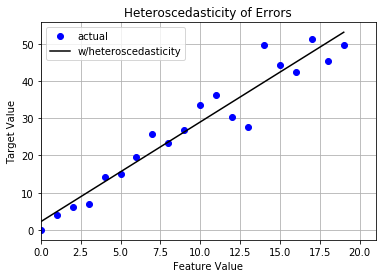

In [44]:
plt.plot(x, y_hetero, 'bo', label='actual')
plt.plot(x, linear_hetero.predict(x_reshape), 'k', label='w/heteroscedasticity')
plt.title('Heteroscedasticity of Errors')
plt.xlim(0,21)
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

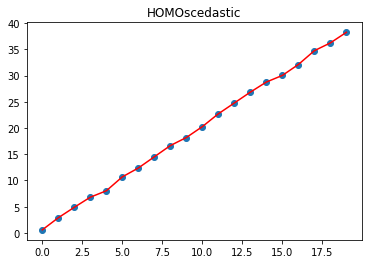

In [46]:
import matplotlib.pyplot as plt

plt.scatter(x_reshape, y_homo)
plt.plot(x_reshape, y_homo, color='red')

plt.title('HOMOscedastic')
plt.show()

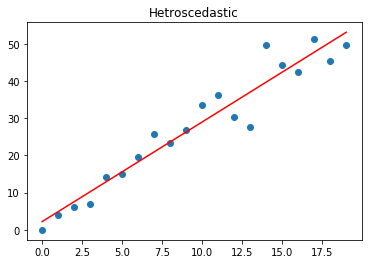

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x_reshape, y_hetero)
plt.plot(x_reshape, y_hetero_p, color='red')

plt.title('Hetroscedastic')
plt.show()

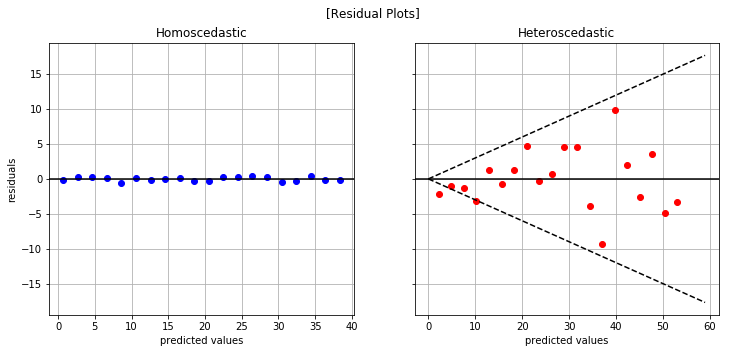

In [48]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear_homo.predict(x_reshape), y_homo-linear_homo.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(linear_hetero.predict(x_reshape), y_hetero-linear_hetero.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Heteroscedastic')
axes[1].set_xlabel('predicted values');
axes[1].plot([x*0.3 for x in range(60)], 'k--')
axes[1].plot([-x*0.3 for x in range(60)], 'k--');

# Normality Test


In [49]:

normaltest(y_homo-linear_homo.predict(x_reshape))

NormaltestResult(statistic=array([1.71234546]), pvalue=array([0.42478474]))

In [50]:
normaltest(y_hetero-linear_hetero.predict(x_reshape))

NormaltestResult(statistic=array([1.04126656]), pvalue=array([0.59414417]))

#Takeaway
Standard errors, confidence intervals, and hypothesis tests rely on the assumption that errors are homoscedastic. If this assumption is violated, you cannot trust values for the previous metrics!!!

#Possible Solutions
Consider log transforming the target values

In [0]:

y_hetero_log = np.log10(np.array(y_hetero) + 1e1)
x_reshape_log = np.log10(np.array(x_reshape) + 1e1)

# fit models
linear_hetero_log = LinearRegression()
linear_hetero_log.fit(x_reshape, y_hetero_log);

linear_hetero_log_log = LinearRegression()
linear_hetero_log_log.fit(x_reshape_log, y_hetero_log);

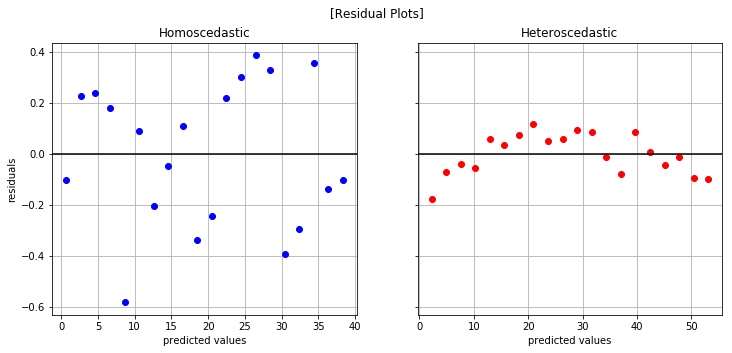

In [52]:

fig, axes = plt.subplots(1, 2, sharex=False, sharey=True)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear_homo.predict(x_reshape), y_homo-linear_homo.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(linear_hetero.predict(x_reshape), y_hetero_log-linear_hetero_log.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Heteroscedastic')
axes[1].set_xlabel('predicted values');